In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

In [3]:
X = loadmat('./ex7_data/ex7data1.mat')['X']
# X = mat[:,0]
# y = mat[:,1]
# X.shape, y.shape
X.shape

(50, 2)

In [9]:
def data_display():
    plt.plot(X[:,0],X[:,1],'bo')

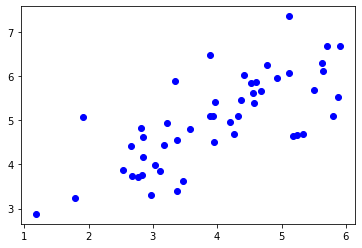

In [10]:
data_display()

In [64]:
a = np.array([[1,2,3],[1,2,3],[1,2,3]])
# for i in a:
#     print(i[2])
# b = np.zeros(3)
# np.append(b,2)
a[1,1]

2

In [57]:
type(float(X[:,0][0]))

float

In [59]:
c = np.zeros(10)

In [78]:
def min_centroid(xi, uj):
    distance = np.zeros(uj.shape[0])
    for j in range(uj.shape[0]):
            distance[j]=(xi[0]-uj[j,0])**2 +(xi[1]-uj[j,1])**2
    min_loc = np.argmin(distance)
    return min_loc

numpy.argmax(...) 获得括号里ndarray里的最大元素的索引

numpy.argmin(...) 获得括号里ndarray里的最小元素的索引

In [175]:
def find_closest_centroids(X, uj):
    centr_classfi = []
    for x in X:
       centr_classfi.append(min_centroid(x,uj))
    return centr_classfi


In [265]:
dfb = pd.DataFrame(X)
dfb.insert(dfb.shape[1],'class',1)
dfb.iloc[:,0:2].head()

,0,1
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


In [336]:
def plotData(X, uj, centr_classfi):
    # assert type(X)==pd.DataFrame, 'X in plotDate must is pd.DataFrame'
    colors = ['b','g','gold','darkorange','salmon','olivedrab', 
              'maroon', 'navy', 'sienna', 'tomato', 'lightgray', 'gainsboro'
             'coral', 'aliceblue', 'dimgray', 'mintcream', 'mintcream']
    X_df = pd.DataFrame(X)
    X_df.insert(X_df.shape[1],'class',centr_classfi)

    num_centr = set(centr_classfi)
    for i in num_centr:
        xx = X_df[X_df['class'] == i].values[:,:2]
        plt.scatter(xx[:,0],xx[:,1],c=colors[i], label='Cluster %d'%i)
    plt.legend(loc=2)
    print(uj)
    plt.plot(uj[:,0],uj[:,1],'rx',markersize=15)
    plt.show()

In [337]:
def init_clutisd():
    #随机初始化 簇中心点
    K=3
    randown_loc = np.random.choice(X.shape[0],K, replace=False)
    array = [X[loc] for loc in randown_loc]
    uj = np.array(array)
    return uj

[[3.34323419 5.89301345]
 [4.37173356 5.46116549]
 [3.97176248 5.40773735]]


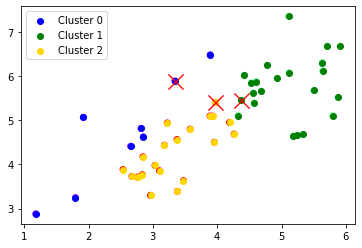

In [345]:
uj = init_clutisd()
centr_classfi = find_closest_centroids(X, uj)
plotData(X, uj, centr_classfi)

In [346]:
def computeMeans(X, centri_class, K):
    # K 分类数
    u = []
    df = pd.DataFrame(X)
    df.insert(df.shape[1],'class',centr_classfi)
    for k in range(K):
        u.append(df[df['class'] == k].mean(0)) #每列求均值
    return np.array(u)


In [347]:
# df = pd.DataFrame(X)
# df.insert(df.shape[1],'class',centr_classfi)

[[2.65503413 3.78870065]
 [5.06370667 5.82478985]
 [3.63508855 4.92522192]]


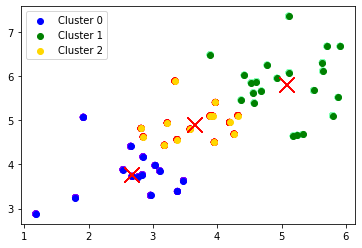

In [349]:
for i in range(10):
    uj = computeMeans(X, centr_classfi, K)[:,:2]
    centr_classfi = find_closest_centroids(X, uj)
plotData(X, uj,centr_classfi)